In [54]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [55]:
images = []
grays = []
for image in os.listdir('images'):
    if 'building' in image:
        images.append(cv2.imread(f'images/{image}'))
        grays.append(cv2.cvtColor(cv2.imread(f'images/{image}'), cv2.COLOR_BGR2GRAY))

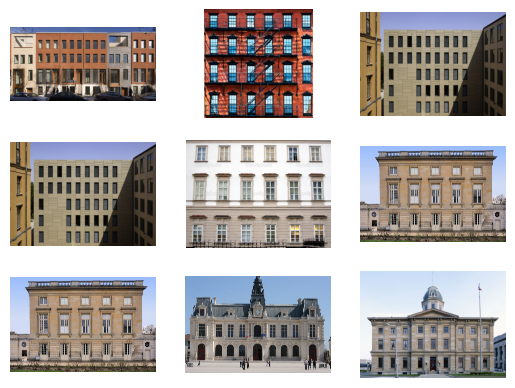

In [56]:
# display all images in a grid
fig, axs = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(cv2.cvtColor(images[i*2+j], cv2.COLOR_BGR2RGB))
        axs[i, j].axis('off')
plt.show()

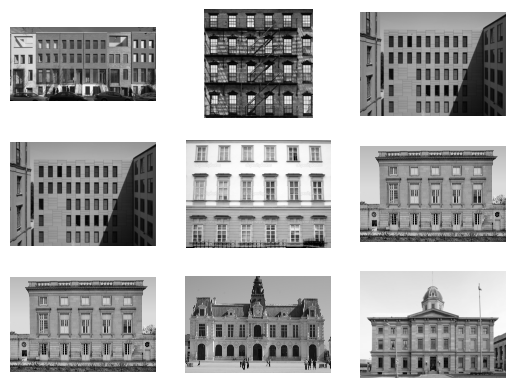

In [57]:
# apply gaussiasn blur to all
blurs = []
for gray in grays:
    blurs.append(cv2.GaussianBlur(gray, (5, 5), 0))

fig, axs = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(cv2.cvtColor(grays[i*2+j], cv2.COLOR_BGR2RGB))
        axs[i, j].axis('off')
plt.show()

In [58]:
# detect edges in all images
edges = []
for blur in blurs:
    edges.append(cv2.Canny(blur, 100, 200))

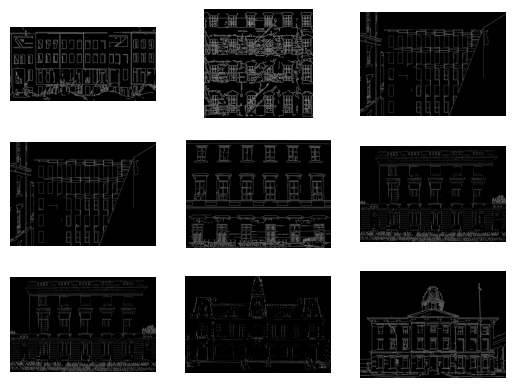

In [59]:
fig, axs = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(cv2.cvtColor(edges[i*2+j], cv2.COLOR_BGR2RGB))
        axs[i, j].axis('off')
plt.show()

In [60]:
# detect lines
lines = []
for edge in edges:
    lines.append(cv2.HoughLines(edge, 1, np.pi/180, 100))

In [61]:
lines_ = []
i = 0
for line in lines:
    for l in line:
        rho, theta = l[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        lines_.append(cv2.line(edges[i], (x1, y1), (x2, y2), (255, 0, 0), 2))

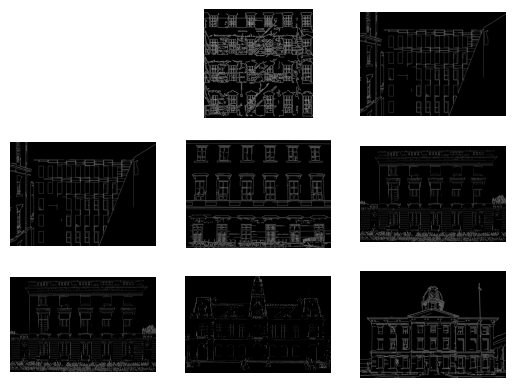

In [62]:
fig, axs = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(cv2.cvtColor(edges[i*2+j], cv2.COLOR_BGR2RGB))
        axs[i, j].axis('off')
plt.show()

In [63]:
horizontal_lines = [[] for _ in range(len(lines))]
i = 0
for line in lines:
    for rho, theta in line[:, 0]:
        if np.pi / 4 < theta < 3 * np.pi / 4:
            horizontal_lines[i].append((rho, theta))
    i += 1

In [64]:
np.array(lines[2]).shape

(326, 1, 2)

In [66]:
y_coords = [[] for _ in range(len(horizontal_lines))]
i = 0
for hori in horizontal_lines:
    for rho, theta in hori:
        y_coords[i].append(rho * np.sin(theta))
        y_coords[i].sort()
    i += 1

In [79]:
def get_avg_coords(y_coord, thresh=250):
    y_coord.sort()
    avg_coord = []
    curr = y_coord[0]
    count = 1

    for i in range(1, len(y_coord)):
        if y_coord[i] - y_coord[i-1] <= thresh:
            curr += y_coord[i]
            count += 1
        else:
            avg_coord.append(curr / count)
            curr = y_coord[i]
            count = 1
    
    avg_coord.append(curr / count)
    return avg_coord

In [80]:
def plot(i):
    avg_coords = get_avg_coords(y_coords[i])
    for y in avg_coords:
        cv2.line(images[0], (0, int(y)), (images[i].shape[1], int(y)), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()